<a href="https://colab.research.google.com/github/mroopram/MIT-GL-Applied-Data-Science-Student-Template---Amazon-Product-Recommendation-System-January-2023/blob/main/MIT_GL_Applied_Data_Science_Student_Template_Capstone_Project_Recommendation_Systems_Feb_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Recommendation System**

# **Milestone 2**

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## **Load the dataset**

In [ ]:
# Load the dataset you have saved at the end of milestone 1

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [ ]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/Great Learning/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Great Learning/song_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [ ]:
# See the info of the count_df data
count_df.info()
count_df.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


False

In [ ]:
# See the info of the song_df data
song_df.info()
song_df.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


True

#### **Observations and Insights: The count dataframe has 4 columns. Two of those columns are int64 and two of the columns are objects. There are no null values in the count dataframe. The song dataframe has 5 columns. Four of those columns are objects and one column is int64. The songs dataframe does have null values.**


In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
merge_df = pd.merge(count_df, song_df, on='song_id', how='left')
merge_df.drop_duplicates()
# Drop the column 'Unnamed: 0'
merge_df = merge_df.drop(['Unnamed: 0'], axis = 1)
print (merge_df)

                                          user_id             song_id  \
0        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995   
1        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B   
2        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0   
3        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0   
4        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D   
...                                           ...                 ...   
2086941  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJEYPO12AAA8C6B0E   
2086942  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJJYDE12AF729FC16   
2086943  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJKQSF12A6D4F5EE9   
2086944  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJUXGA12AC961885C   
2086945  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJYOLS12A8C13C06F   

         play_count                           title              release  \
0                 1                        The 

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [ ]:
# Apply label encoding for "user_id" and "song_id"
merge_df.user_id = pd.factorize(merge_df.user_id)[0]
merge_df.song_id = pd.factorize(merge_df.song_id)[0]
print (merge_df)

         user_id  song_id  play_count                           title  \
0              0        0           1                        The Cove   
1              0        1           2                 Entre Dos Aguas   
2              0        2           1                        Stronger   
3              0        2           1                        Stronger   
4              0        3           1                  Constellations   
...          ...      ...         ...                             ...   
2086941    76352     7159           2       Ignorance (Album Version)   
2086942    76352     1315           4          Two Is Better Than One   
2086943    76352     2965           3  What I've Done (Album Version)   
2086944    76352     1363           1                              Up   
2086945    76352     1963           1      Soil_ Soil (Album Version)   

                     release                             artist_name  year  
0         Thicker Than Water                  

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

In [ ]:
# Get the column containing the users
users = merge_df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():

    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = merge_df.loc[ ~ merge_df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [ ]:
# Drop records with play_count more than(>) 5
df_final = df_final[df_final['play_count'] <= 5]


In [ ]:
# Check the shape of the data

df_final.shape

(154377, 7)

In [ ]:
print(df_final)

         user_id  song_id  play_count                            title  \
209           10      196           1               Daisy And Prudence   
211           10      198           1  The Ballad of Michael Valentine   
212           10      199           1        I Stand Corrected (Album)   
213           10      200           1            They Might Follow You   
214           10      201           1                       Monkey Man   
...          ...      ...         ...                              ...   
2086668    76343      335           1                 Half Of My Heart   
2086670    76343      912           1            Bitter Sweet Symphony   
2086679    76343      289           2       The Police And The Private   
2086689    76343     1033           1                     Just Friends   
2086699    76343      916           1             He Can Only Hold Her   

                       release      artist_name  year  
209               Distillation     Erin McKeown  2000  

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3476

Total number of unique song id

In [ ]:
# Display total number of unique song_id
df_final['song_id'].nunique()

695

Total number of unique artists

In [ ]:
# Display total number of unique artists
df_final['artist_name'].nunique()

258

#### **Observations and Insights: There are 3,476 users, 258 artists and 695 songs in this dataset. There is a possibilty of 897, 066 interactions between users and artists and a possibility of 2,416,515 interactions between users and songs.**


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
df_final['song_id'].value_counts()

110     1652
120     1294
920     1014
1092     975
75       940
        ... 
2088     101
1619      99
3074      93
2683      93
6444      89
Name: song_id, Length: 695, dtype: int64

Most interacted users

In [ ]:
df_final['user_id'].value_counts()

57247    311
22030    267
14778    243
67355    237
76184    212
        ... 
40870      2
45145      1
59478      1
72110      1
24681      1
Name: user_id, Length: 3476, dtype: int64

#### **Observations and Insights:The top 5 most interatced songs were played 940 - 1652 times and the top 5 users that interacted with the most songs played 212-311 songs each**


Songs played in a year

In [ ]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,9515
2007,17510
2008,18619
2009,19856
2010,5541


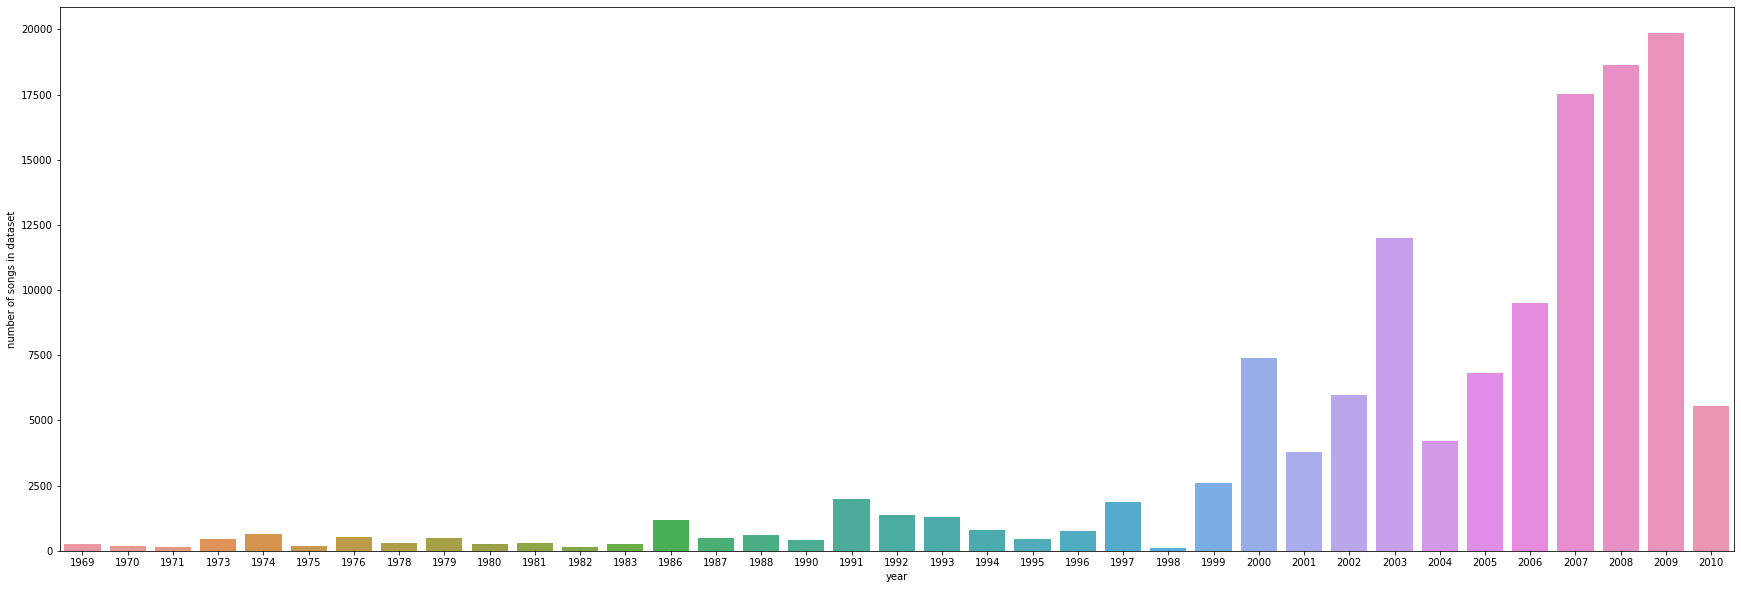

In [ ]:
# Create the plot

# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('number of songs in dataset')

# Show the plot
plt.show()

#### **Observations and Insights: The most songs in the dataset are from the years 2007 to 2009.** #

**Think About It:** What other insights can be drawn using exploratory data analysis?

## **Proposed approach**
**Potential techniques:** What different techniques should be explored?<br>
**Overall solution design:** What is the potential solution design?<br>
**Measures of success:** What are the key measures of success to compare different potential technqiues?<br>

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
average_count = df_final.groupby('song_id').mean()['play_count']     # Hint: Use groupby function on the song_id column
# Calculating the frequency a song is played
play_freq = df_final.groupby(['song_id']).count()['play_count']      # Hint: Use groupby function on the song_id column
print(play_freq)

song_id
2       348
3       137
4       246
6       152
8       790
       ... 
8154    148
8156    116
8215    129
8230    124
9599    147
Name: play_count, Length: 695, dtype: int64


In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
2,1.752874,348
3,1.759124,137
4,1.674797,246
6,1.401316,152
8,2.198734,790


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs
def top_n_songs(data, n, min_interaction=100):
   # Finding songs with the minimum number of interactions
    recommendations = data[data['play_freq'] > min_interaction]
    # Sorting values with respect to the average play count
    recommendations = recommendations.sort_values(by = 'avg_count', ascending = False)

    return recommendations.index[:n]

In [ ]:
# Recommend top 10 songs using the function defined above
list(top_n_songs(final_play, 10, 100))

[3036, 4412, 2991, 2548, 102, 2844, 1919, 2925, 91, 8]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 47.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=3366438 sha256=0c02f53b929908e73fb092b71b5a25cd90dbd390db7372daea055f8c09178923
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0, 5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42) # Take test_size = 0.4

**Think About It:** How changing the test size would change the results and outputs?

In [ ]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based':True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1) # Use random_state = 1

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user) # Use sim_user_user model

RMSE: 1.0611
Precision:  0.405
Recall:  0.711
F_1 score:  0.516


**Observations and Insights: We have calculated RMSE to check how far the overall predicted ratings are from the actual ratings. We are getting a Recall of 0.71, which means out of all relevant songs, 71% are recommended. We are getting a Precision of 0.405, which means out of all reccomended songs 40.5% are relevant.. The F-1 score of the baseline model is 0.516. It indicates most recommended songs were relevant and relevant songs were recommended.**

In [ ]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(76343, 289, r_ui = 2, verbose = True) # Use user id 76343 and song_id 289

user: 76343      item: 289        r_ui = 2.00   est = 1.51   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=76343, iid=289, r_ui=2, est=1.5077639423018885, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(76343, 200, verbose = True) # Use user_id 76343 and song_id 200

user: 76343      item: 200        r_ui = None   est = 1.20   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=76343, iid=200, r_ui=None, est=1.2, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights: The above output of this user-user-similarity-based baseline model shows the predicted rating for the first user-item pair is 1.51 which is close to the actual rating which is 2. The second user-item pair predicts the user will play a song they haven't heard yet 1.69 times.**

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)
# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9775382185976683
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [ ]:
# Train the best model found in above gridsearch
# Using the optimal similarity measure for user-user collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 0.9831
Precision:  0.452
Recall:  0.744
F_1 score:  0.562


**Observations and Insights: We can see from above that after tuning the hyperparameters the RMSE is slightly lower than the baseline value and the optimized Precision and Recall values are slightly higher than the baseline**

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 76343, song_id 289 and r_ui = 2
sim_user_user_optimized.predict(76343, 289, r_ui = 2, verbose = True)

user: 76343      item: 289        r_ui = 2.00   est = 1.96   {'actual_k': 28, 'was_impossible': False}


Prediction(uid=76343, iid=289, r_ui=2, est=1.9592395261623232, details={'actual_k': 28, 'was_impossible': False})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 76343)
sim_user_user_optimized.predict(76343, 200, verbose = True)

user: 76343      item: 200        r_ui = None   est = 2.89   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=76343, iid=200, r_ui=None, est=2.8868304267686273, details={'actual_k': 30, 'was_impossible': False})

**Observations and Insights: We can say that the predicted rating by the tuned model is closer to the actual rating when compared to the base-line model.**

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [ ]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, k=5)

[907, 576, 1667, 2590, 996]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot_table(index ='user_id', columns ='song_id', values ='play_count')

    # Extracting those business ids which the user_id has not visited yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the business ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user


In [ ]:
# Make top 5 recommendations for user_id 76343 with a similarity-based recommendation engine
recommendations =get_recommendations(df_final, 76343, 5, sim_user_user_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,3036,4.024934
1,4412,3.194583
2,1396,3.022795
3,200,2.886830
4,2548,2.801640


**Observations and Insights: According to our user-user reccomendation model, user 76343 will play the top 5 reccomendations 2.8 - 4 times each.**

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_play):
  # Sort the songs based on play counts
  ranked_songs = final_play.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending = False)

  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [ ]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
3,3036,111,4.024934,3.930018
4,4412,103,3.194583,3.096050
2,1396,136,3.022795,2.937046
0,200,586,2.886830,2.845521
1,2548,161,2.801640,2.722829


**Observations and Insights: When ranking songs by their average play frequency the results show the user will play the top 5 recommended songs slightly less, but the presictions are very close.**

### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# The KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0077
Precision:  0.313
Recall:  0.561
F_1 score:  0.402


**Observations and Insights: The baseline RMSE value of this Item-Item similarity model shows it fits the training data a little better than the User-User baseline model. The Recall measurement of the baseline item-item model shows out of all relevant songs, 56.1% are recommended. The Precision measurement shows 31.3% songs are relevant. The F-1 score indicates 40.2% of recommended songs were relevant and relevant songs were recommended. Optimizing these values will help to improve the model.**

In [ ]:
# Predicting play count for a sample user_id 76343 and song (with song_id 289) heard by the user
sim_item_item.predict(76343, 289, r_ui = 2, verbose = True)

user: 76343      item: 289        r_ui = 2.00   est = 1.86   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=76343, iid=289, r_ui=2, est=1.8582907049763921, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 289)
sim_item_item.predict(76343, 200, verbose = True)

user: 76343      item: 200        r_ui = None   est = 2.10   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=76343, iid=200, r_ui=None, est=2.1032554698818324, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights: The baseline item-item recommendation model predicts user 76343 will listen to song 289 1.86 times. The user actually listened to the song 2 times. In this case the predicted value is close to the actual value. This model also perdicts user 76343 will list to a song they never played 2.10 times.**

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9618480467595346
{'k': 20, 'min_k': 3, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [ ]:
# Apply the best modle found in the grid search

# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'msd',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 20, min_k = 3, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k = 10
precision_recall_at_k(sim_item_item_optimized)

RMSE: 0.9982
Precision:  0.365
Recall:  0.539
F_1 score:  0.435


**Observations and Insights:After tuning the hyperparamters of the baseline Item-Item similarity model the meausrements improved slightly. The RMSE value went from 1.00 to .998. The user-user model shows the RMSE is .0983. The Precision and F-1 values of the Item-item model also increased slightly after tuning the hyperparameters.**

In [ ]:
# Predict the play_count by a user(user_id 76343) for the song (song_id 289)
sim_item_item_optimized.predict(76343, 289, r_ui = 2, verbose = True)

user: 76343      item: 289        r_ui = 2.00   est = 1.63   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=76343, iid=289, r_ui=2, est=1.633868025373466, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
# Predicting play count for a sample user_id 76343 with song_id 200 which is not heard by the user
sim_item_item_optimized.predict(76343, 200, verbose = True)

user: 76343      item: 200        r_ui = None   est = 1.60   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=76343, iid=200, r_ui=None, est=1.600088710937477, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights: The optimized item-item recommendation model predicts user 76343 will listen to song 289 1.63 times. The user actually listened to the song 2 times. This model also perdicts user 76343 will listen to a song they never played 1.60 times.**

In [ ]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[3, 5, 25, 29, 30]

In [ ]:
# Making top 5 recommendations for user_id 76343 with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 76343, 5, sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = [76343, 'predicted_ratings'])

,76343,predicted_ratings
0,3036,2.882349
1,410,2.763948
2,3091,2.750000
3,1396,2.678772
4,313,2.672872


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
4,3036,111,2.882349,2.787433
1,410,158,2.763948,2.684393
3,3091,127,2.750000,2.661264
0,313,198,2.672872,2.601805
2,1396,136,2.678772,2.593023


**Observations and Insights: According to our item-item reccomendation model, user 76343 will play the top 5 reccomendations 2.6 - 2.8 times each.  When ranking songs by their average play frequency the results show the user will play the top 5 recommended songs slightly less, but the predictions are very close.**

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd

# Using SVD matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the train set
svd.fit(trainset)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(svd)

RMSE: 0.9761
Precision:  0.43
Recall:  0.659
F_1 score:  0.52


In [ ]:
# Making prediction for user (with user_id 76343) to song (with song_id 289), take r_ui = 2
svd.predict(76343, 289, r_ui = 2, verbose = True)

user: 76343      item: 289        r_ui = 2.00   est = 2.17   {'was_impossible': False}


Prediction(uid=76343, iid=289, r_ui=2, est=2.1719173491269546, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 200)
svd.predict(76343, 200, verbose = True)

user: 76343      item: 200        r_ui = None   est = 2.75   {'was_impossible': False}


Prediction(uid=76343, iid=200, r_ui=None, est=2.753758050519032, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9910189791421923
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [ ]:
# Building the optimized SVD model using optimal hyperparameter search
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Training the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k = 10
precision_recall_at_k(svd_optimized)

RMSE: 0.9873
Precision:  0.406
Recall:  0.64
F_1 score:  0.497


**Observations and Insights: The results of our Matrix Factorization model are close to the results of the Similarity based models. The RMSE is 0.98, the Recall measurement shows out of all relevant songs, 64% are recommended. The Precision measurement shows 40.6% songs are relevant. The F-1 score indicates 49.7% of recommended songs were relevant and relevant songs were recommended.**

In [ ]:
# Using svd_algo_optimized model to recommend for userId 76343 and song_id 289
svd_optimized.predict(76343, 289, r_ui = 2, verbose = True)

user: 76343      item: 289        r_ui = 2.00   est = 1.97   {'was_impossible': False}


Prediction(uid=76343, iid=289, r_ui=2, est=1.9651752657484032, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 76343 and song_id 200 with unknown baseline rating
svd_optimized.predict(76343, 200, verbose = True)

user: 76343      item: 200        r_ui = None   est = 2.24   {'was_impossible': False}


Prediction(uid=76343, iid=200, r_ui=None, est=2.244344498682249, details={'was_impossible': False})

**Observations and Insights: This model predicts user 76343 will listen to song 289 1.97 times, which is the closest prediction to the actual times the user listened to the song. This model also perdicts user 76343 will listen to a song they never played 2.24 times.**

In [ ]:
# Getting top 5 recommendations for user_id 76343 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 76343, 5, svd_optimized)

In [ ]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,3036,111,3.302055,3.207139
3,4412,103,2.839585,2.741053
1,2991,115,2.784054,2.690803
4,1619,99,2.694247,2.593743
0,2548,161,2.649355,2.570544


**Observations and Insights: Our Matrix Factorization model predicted user 76343 will play the top 5 reccomendations (based on play frequency) 2.6 - 3.3 times each. The corrected ratings show the user will play the top 5 recommended songs slightly less, but the predictions are very close.**

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
# Using Co-Clustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0249
Precision:  0.397
Recall:  0.583
F_1 score:  0.472


In [ ]:
# Making prediction for user_id 76343 and song_id 289
clust_baseline.predict(76343, 289, r_ui = 2, verbose = True)

user: 76343      item: 289        r_ui = 2.00   est = 1.81   {'was_impossible': False}


Prediction(uid=76343, iid=289, r_ui=2, est=1.813803875497903, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 76343) for a song(song_id 200) not heard by the user
clust_baseline.predict(76343, 200, verbose = True)

user: 76343      item: 200        r_ui = None   est = 2.33   {'was_impossible': False}


Prediction(uid=76343, iid=200, r_ui=None, est=2.3262445319513967, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0371131768311876
{'n_cltr_u': 5, 'n_cltr_i': 6, 'n_epochs': 20}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [ ]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5, n_cltr_i = 6, n_epochs = 20, random_state = 1)

**Observations and Insights: The baseline co-clustering model shows an RMSE of 1.02, the Recall measurement indicates out of all relevant songs, 58.3% are recommended. The Precision measurement shows 39.7% songs are relevant. The F-1 score indicates 47.2% of recommended songs were relevant and relevant songs were recommended.**

In [ ]:
# Using co_clustering_optimized model to recommend for userId 76343 and song_id 289
clust_tuned.fit(trainset)

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 76343 and song_id 200 with unknown baseline rating
precision_recall_at_k(clust_tuned)

RMSE: 1.0490
Precision:  0.393
Recall:  0.557
F_1 score:  0.461


**Observations and Insights: The optimized co-clustering model shows an RMSE of 1.04, the Recall measurement indicates out of all relevant songs, 55.7% are recommended. The Precision measurement shows 39.3% songs are relevant. The F-1 score indicates 46.1% of recommended songs were relevant and relevant songs were recommended. According to these results the optimized version is performing slightly worse than the baseline.**

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 76343 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 76343, 5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,2548,161,3.538000,3.459189
4,3036,111,3.512832,3.417916
1,2844,132,3.305173,3.218134
3,2925,112,3.292673,3.198182
2,1740,122,3.131281,3.040745


**Observations and Insights: When considering the play frequency of each song the co-clustering model predicts the user will play the top 5 recommended songs 3.1-3.5 times each. The corrected values show the user will play the reccomended songs slightly less, but the results are very close to the prediction.**

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
df_small = df_final

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']

df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
209,10,196,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
211,10,198,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
212,10,199,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
213,10,200,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
214,10,201,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])

# Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,10,196,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,10,198,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),10,199,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,10,200,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,10,201,1,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Create the series of indices from the data
indices = indices = pd.Series(df_small.index)

# Let us see the first 5 indices
indices[:5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

nltk.download('omw-1.4')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [ ]:
# Function to tokenize the text
def tokenize(text):

    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    tokens = word_tokenize(text)

    words = [word for word in tokens if word not in stopwords.words("english")]  # Use stopwords of english

    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

In [ ]:
# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
songs_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

# Making the DataFrame of movie_tfidf data
pd.DataFrame(songs_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,1598,1599,1600,1601,1602,1603,1604,1605,1606,1607
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(songs_tfidf, songs_tfidf)

# Let us see the above array
similar_songs

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03198715],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.03198715, ..., 0.        , 0.        ,
        1.        ]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[484, 566, 256, 643, 506, 392, 465, 478, 477, 479]


['Big Me',
 'Everlong',
 'The Pretender',
 'Just Lose It',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Creature Fear',
 'Speak',
 'Black Hole Sun']

**Observations and Insights: This Content Based Similarity Model is shows top songs that are similar to the title of song Learn to FLy. A better method would involve finding similiarity based on different features of the songs such as genre or release year**

## **Conclusion and Recommendations:**

- **Refined Insights -** *What are the most meaningful insights from the data relevant to the problem?*


The Cluster based model performed the worst when considering RMSE. All other models have a similar RMSE with the User-User model having the best results.

Precision, and Recall are also low in the Cluster based model when compared to the other models we used.

The User-User Similarity model has the highest Recall score and the Collaborative Filtering system has the highest Precision score. The User-User Precision score is a very close 2nd when compared to Collaborative Filtering.

We see differences between the User-User and Item-Item results indicating Customer Segmentation.


- **Comparison of various techniques and their relative performance -** *How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?*


The SVD recommendations has the largest average difference between predicted and correct ratings. While the User-User model has the lowest average difference between predicted and correct ratings. This shows the User-User model is performing relatively better than the other models.  

In order to improve the scope further we should consider the songs in the dataset which are skewed to a specific time period. We would benefit from a broader range of music within our models. This would offer more options to the client as well as being more favorable to a wider audience. It may also help us understand the customer segmentation better.

Including genre as a feature in the dataset is a preferred indicator of the style of music a user enjoys over song title, which is what we had available for the Content Based Recommendation Model. This model is the least expensive to maintain and would benefit from the additoinal data.



- **Proposal for the final solution design -** *What model do you propose to be adopted? Why is this the best solution to adopt?*

The User-User similarity model has the best RMSE, Recall, and F-1 values after hyperparameter tuning. It’s also one of the best when considering Precision and predicted play counts for its top 5 recommended songs.  

These outcomes tell us out of all the models we tested the User-User Similarity model is most likely to recommend songs that will increase song play counts. This should keep users engaged for a longer time when using the streaming service.

Althought this is the best option based on our results there are risks to consider:

User-User recommendation systems have trouble handling new data which is known as a Cold Start problem. It’s also unable to compute ratings if there is very little user preferences available.
The performance of the model will have to be continually monitored based on real time data and adjusted according to the findings.
It will be costly to maintain because it’s computationally expensive to scale due to the number of interactions and calculations that need to take place at once.
